(a) Lassen Sie sich von Python das machine epsilon f¨ur single und double precision aus-
geben.

In [ ]:
epsilon = 1.0
while 1.0 + epsilon != 1:
    epsilon /= 2
print(epsilon * 2)

2.220446049250313e-16


In [ ]:
import numpy as np

# Machine Epsilon für single precision (float32)
print("Single Precision (float32):", np.finfo(np.float32).eps)

# Machine Epsilon für double precision (float64)
print("Double Precision (float64):", np.finfo(np.float64).eps)

Single Precision (float32): 1.1920929e-07
Double Precision (float64): 2.220446049250313e-16


(b) Was bekommen Sie in Python f¨ur folgende Rechnungen:
a = (10 − 10) − 10−16, b = 10 − (10 + 10−16).
Was ist passiert?


In [ ]:
a = (10 - 10) - 10 ** (-16)
b = 10 - (10 + 10 ** (-16))

print(f"a ist {a} und b ist {b}")

a ist -1e-16 und b ist 0.0


(c) Finden Sie die (m¨oglicherweise unendlichen) Bin¨ardarstellungen von 0.2 und 0.5
(also Exponent und Stellen) und erkl¨aren Sie damit die Resultate in Python f¨ur
0.1*n+0.1*n+0.1*n==0.3*n f¨ur n = 2 und n = 5? )


In [ ]:
def ub2c(n):
    return 0.1 * n + 0.1 * n + 0.1 * n == 0.3 * n


ub2c(5)

True

0.2 kann nicht auf IEEE 754 (single precision) genau dargestellt werden, wir bekommen stattdessen eine abgerundete Zahl. Siehe "1" am Ende 

00111110010011001100110011001101

Was bekommen Sie in Python f¨ur folgende Eingaben: 10**16+1 und 1.0*10**16+1
Was ist passiert?

In [ ]:
10**16 + 1

10000000000000001

In [ ]:
1.0 * 10**16 + 1

1e+16

In [31]:
x = 1.0e16
eps = 1

while x + eps == x:
    eps *= 2
    print(eps)

# Der letzte gültige Wert war zu klein
eps /= 2
print("Größtes Epsilon mit x + eps == x:", eps)

2
Größtes Epsilon mit x + eps == x: 1.0


Machine Epsilon scheint hier genau 1 zu sein, deswegen macht +1 keinen unterschied. Beim integer-Berechnung gibt es das Problem nicht.

In [ ]:
2 ** (-23)

1192092895.5078125

2b: Schreiben Sie Code, der Ihnen ”reelle” Zahlen durch Runden von x ∈
[min(FN ), max(FN )] nach F definiert wie in (a) abbildet. ¨Uberpr¨ufen Sie Ihre
Absch¨atzungen aus (b) numerisch, in dem Sie viele (zB 1000) Zahlen runden und
den relativen Fehler darstellen

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [53]:
b = 3
t = 2
emin = -1
emax = 3

mantissas = [d1 * b ** (-1) + d2 * b ** (-2) for d1 in [1, 2] for d2 in [0, 1, 2]]
exponents = range(emin, emax + 1)

# Normalised numbers belonging F
FN = sorted(m * (b**e) for m in mantissas for e in exponents)

In [54]:
# 2. Runden zur nächsten Zahl in FN
# [List them (Find the indices with minimum distances to z (Find the distances to z in F))]
def fl(z, F):
    return F[np.argmin(np.abs(np.array(F) - z))]

In [ ]:
np.random.seed(17)
x_vals = np.random.uniform(min(FN), max(FN), 10000)
fl_vals = np.array([fl(x, FN) for x in x_vals])

In [56]:
rel_errors = np.abs(fl_vals - x_vals) / np.abs(x_vals)
the_rel_error = 1 / 2 * b ** (1 - t)

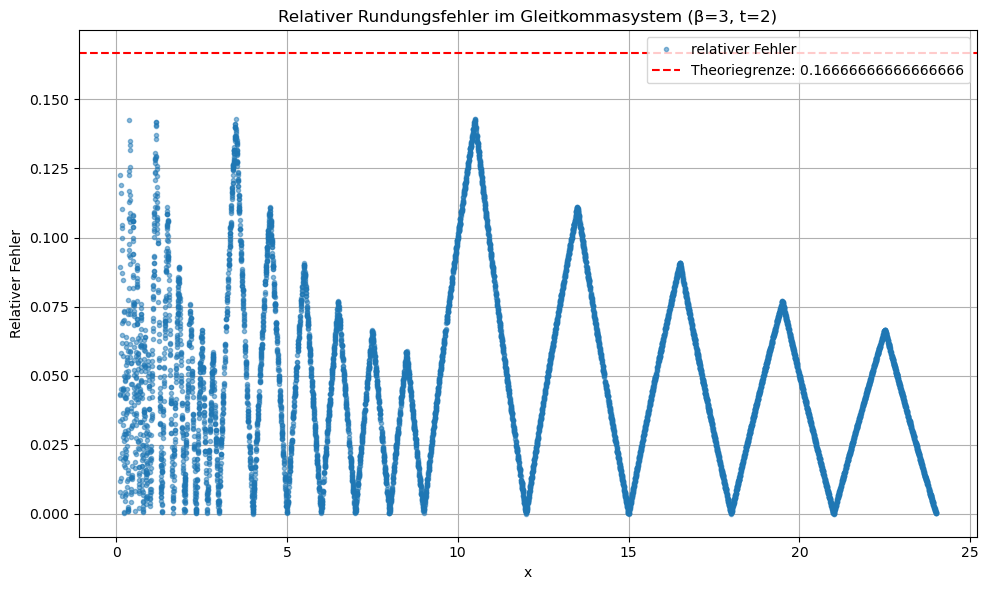

In [ ]:
# 6. Plot
plt.figure(figsize=(10, 6))
plt.plot(x_vals, rel_errors, ".", alpha=0.5, label="relativer Fehler")
plt.axhline(
    the_rel_error, color="red", linestyle="--", label=f"Theoriegrenze: {the_rel_error}"
)
plt.xlabel("x")
plt.ylabel("Relativer Fehler")
plt.title("Relativer Rundungsfehler im Gleitkommasystem (β=3, t=2)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Dasselbe für IEEE 754?

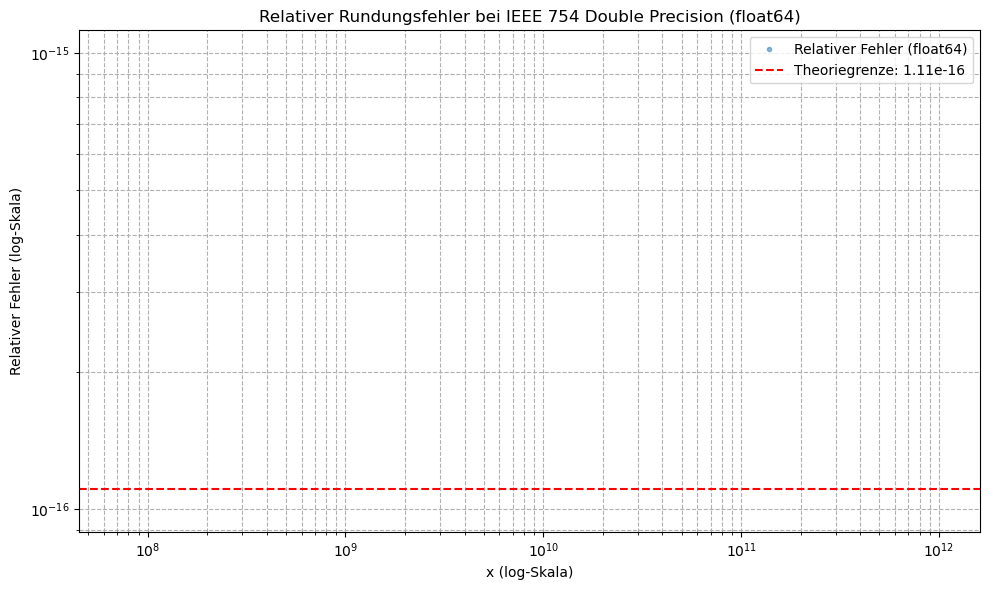

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# IEEE 754 double precision system (float64)
# Schritt 1: 1000 Werte im Bereich [1e-12, 1e12] erzeugen
np.random.seed(0)
x_vals = np.random.uniform(1e-12, 1e12, 10000).astype(np.float64)


# Schritt 2: Runden (implizit durch float64)
def fl_64(x):
    return np.float64(x)


# Schritt 3: Anwendung und relativer Fehler
fl_vals = fl_64(x_vals)
rel_errors = np.abs(fl_vals - x_vals) / np.abs(x_vals)

# Schritt 4: Theoretische Grenze berechnen
theoretical_bound = 0.5 * 2**-52

# Schritt 5: Plot
plt.figure(figsize=(10, 6))
plt.plot(x_vals, rel_errors, ".", alpha=0.5, label="Relativer Fehler (float64)")
plt.axhline(
    theoretical_bound,
    color="red",
    linestyle="--",
    label=f"Theoriegrenze: {theoretical_bound:.2e}",
)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("x (log-Skala)")
plt.ylabel("Relativer Fehler (log-Skala)")
plt.title("Relativer Rundungsfehler bei IEEE 754 Double Precision (float64)")
plt.legend()
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()

In [5]:
np.spacing(1)

2.220446049250313e-16

In [6]:
0.1 + 0.1 + 0.1

0.30000000000000004

In [ ]:
x = 2 * 10**308
print(type(x))
print(x)

<class 'int'>
200000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000


 (P) As you know, for differentiable functions f holds f ′(x0) = lim h→0 f (x0 + h) − f (x0) h . Thus, to numerically approximate a derivative of a function for which the derivative is hard to derive analytically, one can use, for a small h, the approximation f ′(x0) ≈ f ′ num(x0) := f (x0 + h) − f (x0) h . Compute approximations of the derivative of the function f (x) = exp(x) cos(x)3 + sin(x)3 at x0 = π/4. In order to do so, use progressively smaller perturbations h = 10−k for k = 1, . . . 16. Present the errors in the resulting approximation in a log-log plot, i.e., use a logarithmic scale to plot the values of h on the x-axis, and a logarithmic scale to plot the errors between the finite difference approximation f ′ num(x0) and the exact value, which is (rounded) f ′(x0) = 3.101766393836051, on the y-axis. What do you observe as h becomes smaller, and for which h do you get the best approximation to the derivative? Discuss.

In [ ]:
def f(x):
    return np.exp(x) / (np.cos(x) ** 3 + np.sin(x) ** 3)

In [ ]:
xo = np.pi / 4
der_approx = list()
for k in range(1, 16 + 1):
    h = 10 ** (-k)
    der_approx.append((f(xo + h) - f(xo)) / h)

In [54]:
der_exact = 3.101766393836051
errors = [np.abs(x - der_exact) for x in der_approx]
errors

[0.3408173732628552,
 0.031421299991089224,
 0.003105892249692044,
 0.0003102179824945317,
 3.101809262062716e-05,
 3.1014014392205524e-06,
 3.0985666610305884e-07,
 5.4466728904856154e-09,
 4.4953588274054823e-07,
 1.3377143024406735e-06,
 6.351020368144944e-05,
 0.00019673696663646822,
 0.006464601181114471,
 0.05126699609939367,
 0.006858075114386963,
 5.780017803165201]

In [55]:
errors

[0.3408173732628552,
 0.031421299991089224,
 0.003105892249692044,
 0.0003102179824945317,
 3.101809262062716e-05,
 3.1014014392205524e-06,
 3.0985666610305884e-07,
 5.4466728904856154e-09,
 4.4953588274054823e-07,
 1.3377143024406735e-06,
 6.351020368144944e-05,
 0.00019673696663646822,
 0.006464601181114471,
 0.05126699609939367,
 0.006858075114386963,
 5.780017803165201]

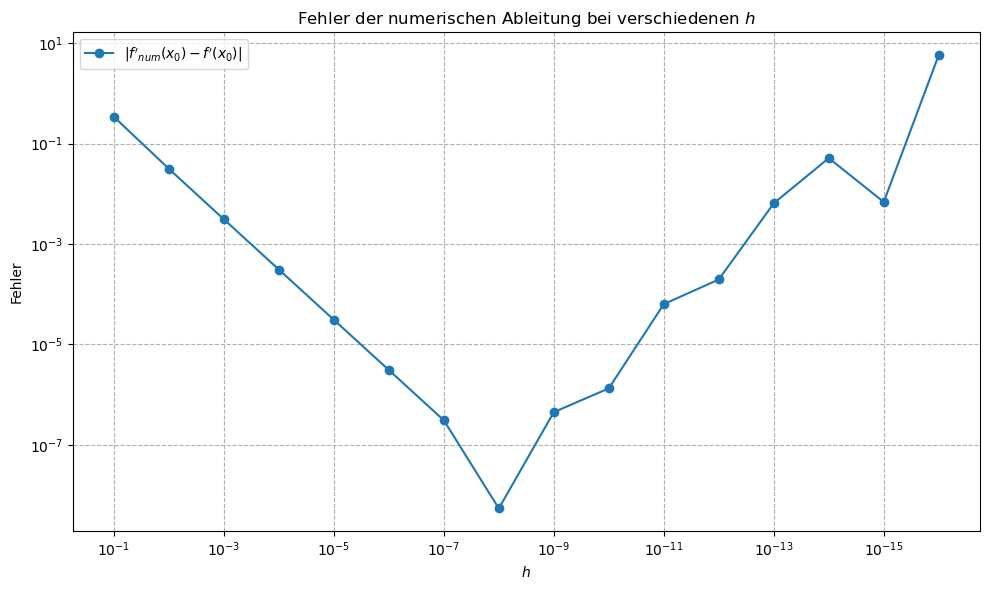

In [57]:
# Plot log-log error vs h
plt.figure(figsize=(10, 6))
plt.loglog(
    [10 ** (-k) for k in range(1, 16 + 1)],
    errors,
    marker="o",
    label=r"$|f'_{num}(x_0) - f'(x_0)|$",
)
plt.xlabel(r"$h$")
plt.ylabel("Fehler")
plt.title("Fehler der numerischen Ableitung bei verschiedenen $h$")
plt.grid(True, which="both", ls="--")
plt.legend()
plt.tight_layout()
plt.gca().invert_xaxis()
plt.show()

# 2-2
Sie wollen y = (a + b) · c in einem Gleitkommasystem mit β = 10 und t = 5 berechnen (Exponenten beliebig klein bzw. groß). (a) Vergleichen Sie folgende Algorithmen bzgl Ihrer Fehlerverst¨arkung: A1: Schritt 1: Berechne η = a + b, Schritt 2: Berechne y1 = η · c. A2: Schritt 1: Berechne η1 = a · c, Schritt 2: Berechne η2 = b · c, Schritt 3: Berechne y2 = η1 + η2 Wie h¨angen die relativen Fehler im Output von den (unvermeidlichen) Rundungs- fehlern in jedem Schritt ab? (b) Wenden Sie Ihre Analyse auf folgende Zahlen an: a = 0.1, b = −0.099992 und c = 90421. Ermitteln Sie die relativen Fehler in jedem Schritt und im Gesamtergebnis und erkl¨aren Sie Ihre Beobachtungen. (c) (P) Schreiben Sie ein Programm, welches Ihre Rechnung in (b) automatisiert: Ver- wenden Sie die Werte von a und c wie in (b), aber verwenden Sie f¨ur b viele (zB 1000) Werte zwischen -0.5 und 0.5, jeweils auf 5 signifikante Stellen gerundet. Ihr Programm soll dann: • y1 und y2 wie in (a) berechnen (mit Runden in jedem Schritt). • Die relativen Fehler im Ergebnis ermitteln und als Funktion von b plotten. • Plotten Sie außerdem die theoretischen Fehlerschranken aus (a) und diskutieren Sie das Verhalten. Anmerkungen 1: Um eine Zahl x auf n signifikante Stellen zu Runden k¨onnen Sie folgenden Code verwenden: round(x, -int(math.floor(math.log10(abs(x)))) + (n - 1)) Anmerkungen 2: Hier nehmen wir an, dass alle anderen Rundungsfehler, die innerhalb des Bin¨arsystems mit double precision entstehen vernachl¨assigbar sind.

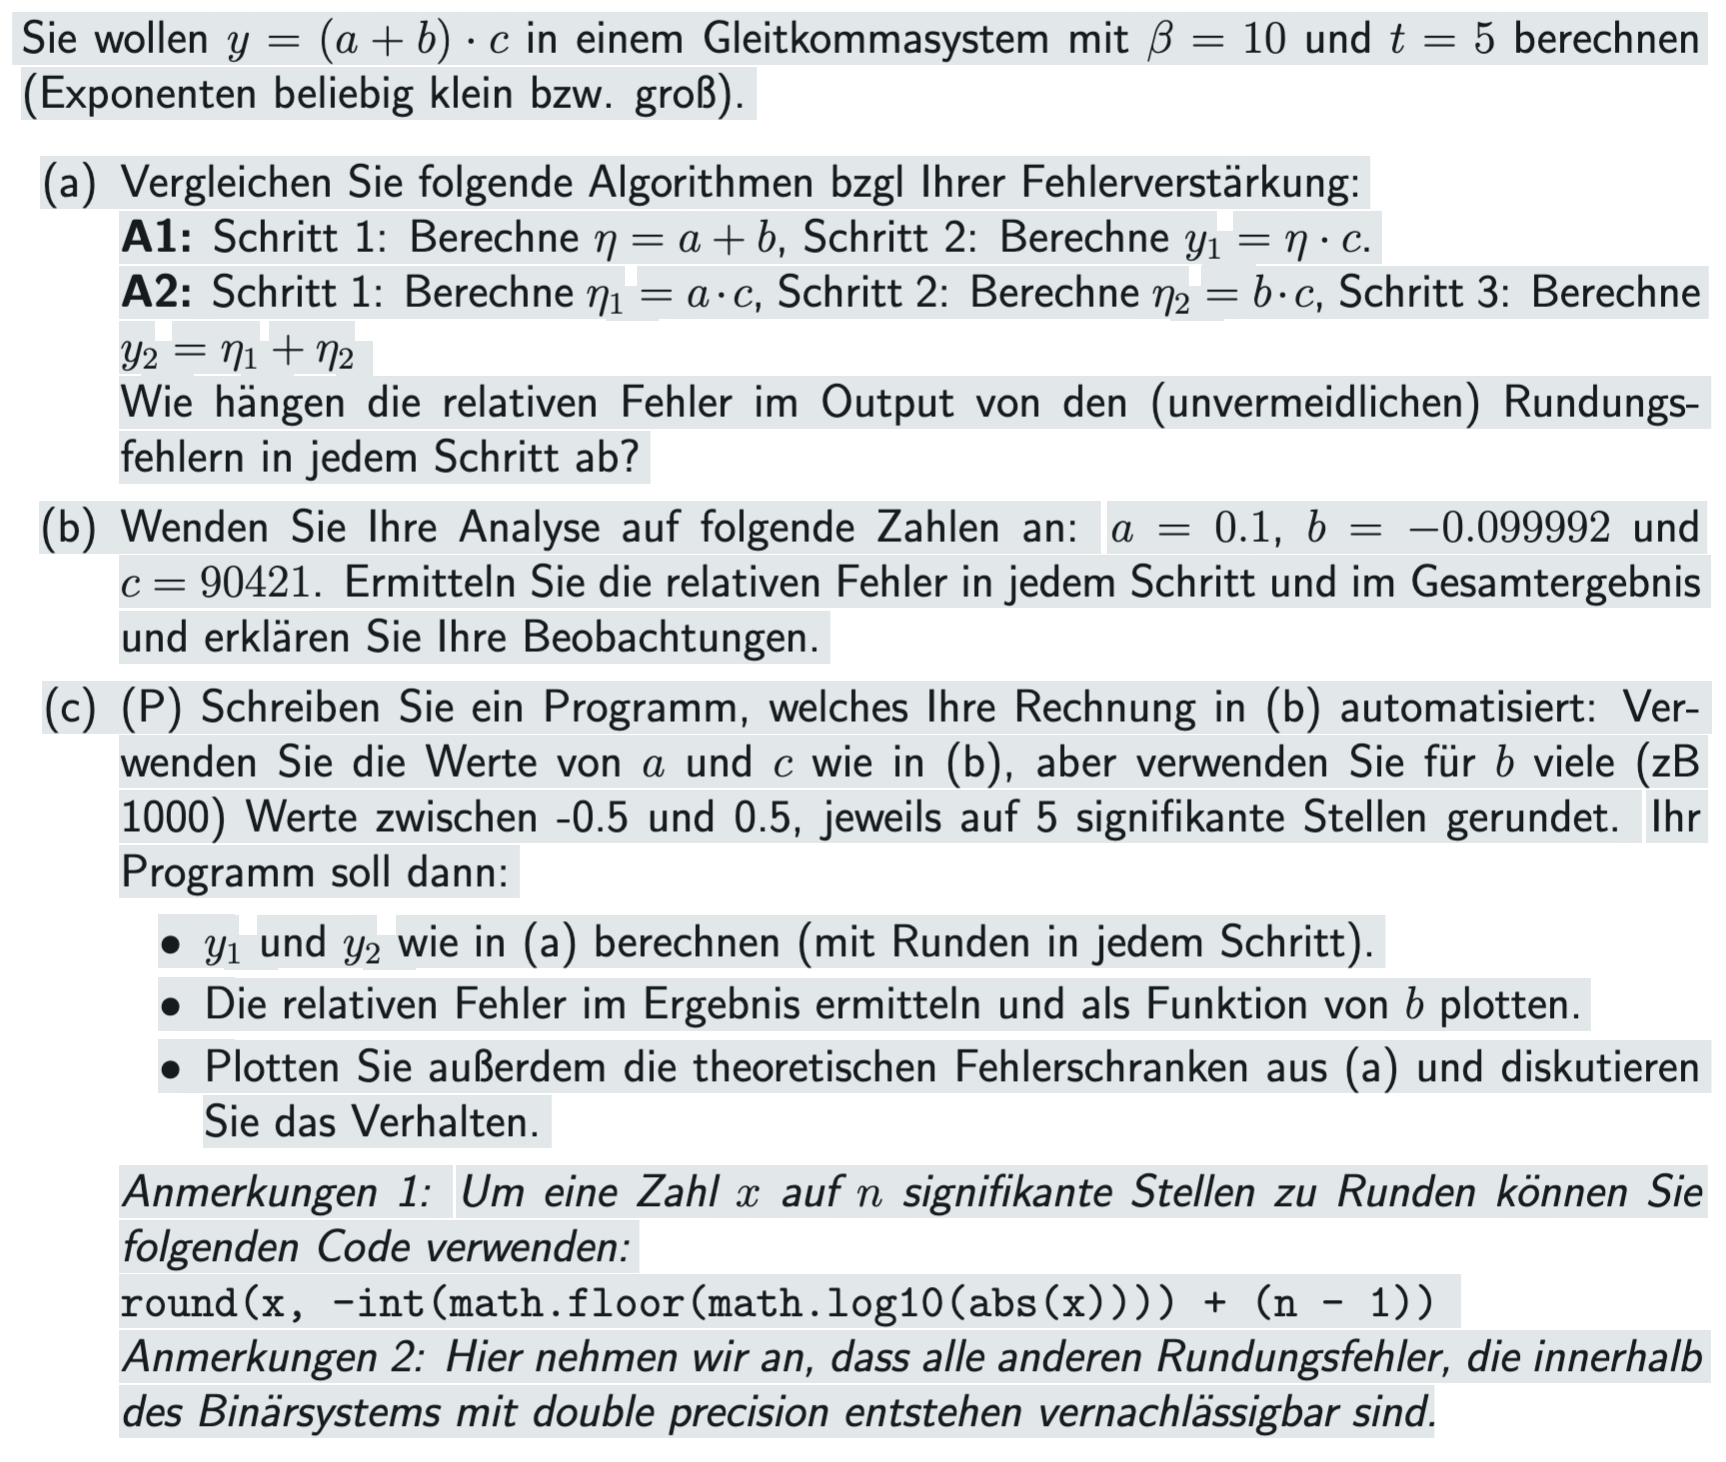

In [ ]:
import math
import numpy as np


def sig_round(x, t=5):
    return round(x, -int(math.floor(math.log10(abs(x)))) + (t - 1))


def a1(a, b, c, t=5, fp=True):
    if fp == False:
        return (a + b) * c
    eta = sig_round(a + b, t)
    return sig_round(eta * c, t)


def a2(a, b, c, t=5, fp=True):
    if fp == False:
        return (a * c) + (b * c)
    eta1 = sig_round(a * c, t)
    eta2 = sig_round(b * c, t)
    return sig_round(eta1 + eta2, t)

In [ ]:
a, b, c = (0.1, -0.099992, 90421)
ar, br, cr = (sig_round(a), sig_round(b), sig_round(c))

exact_result = (a + b) * c
print(
    f"The exact result is {exact_result} but\nA1 ergibt {a1(ar,br,cr)} und A2 ergibt {a2(ar,br,cr)}"
)

The exact result is 0.7233680000007234 but
A1 ergibt 0.72337 und A2 ergibt 0.7


In [ ]:
b_list = np.linspace(-0.5, 0.5, 1000)


def rel_error(comp, exac):
    return abs((comp - exac) / exac)


rel_error(a1(ar, br, cr), exact_result)

2.7648434497007967e-06

In [ ]:
a1_rel_error = []
a2_rel_error = []
for b in b_list:
    a1_rel_error.append(rel_error(a1(ar, sig_round(b), cr), (ar + sig_round(b)) * cr))
    a2_rel_error.append(rel_error(a2(ar, sig_round(b), cr), (ar + sig_round(b)) * cr))

In [ ]:
theoretical_bound = 1 / 2 * 10 ** (1 - 5)
theoretical_bound

5e-05

In [52]:
a2_rel_error[0:10]

[1.1059377799445239e-05,
 5.820725157759054e-07,
 1.2282022581122614e-05,
 3.816460348981165e-06,
 7.9314729672403e-06,
 1.0941781438019952e-05,
 8.480007192293745e-07,
 1.2697783294592392e-05,
 3.6053927114745987e-06,
 8.293614068394983e-06]

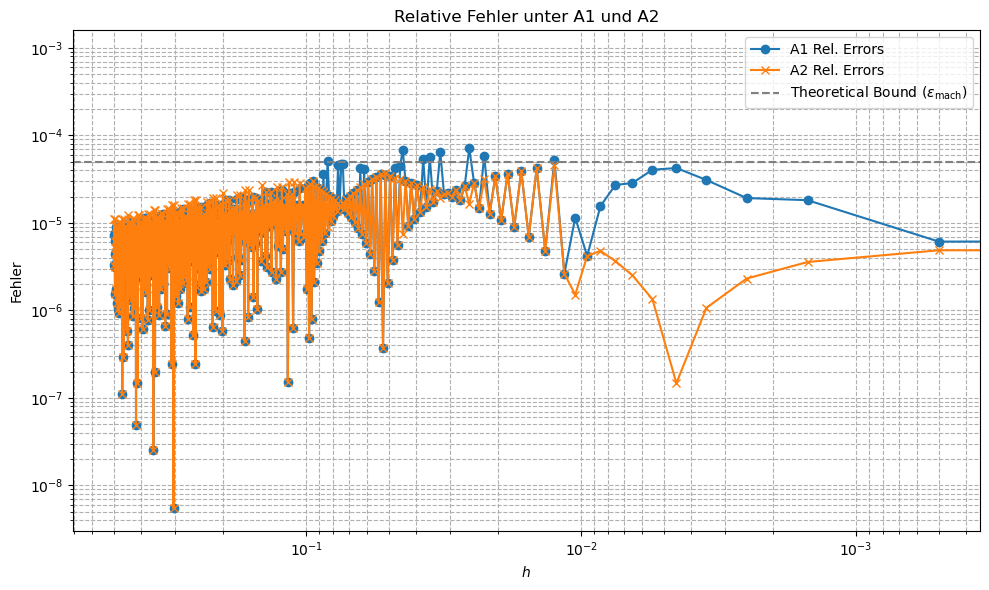

In [ ]:
import matplotlib.pyplot as plt

# Plot log-log error vs h
plt.figure(figsize=(10, 6))
plt.loglog(
    b_list,
    a1_rel_error,
    marker="o",
    label=r"A1 Rel. Errors",
)


plt.loglog(
    b_list,
    a2_rel_error,
    marker="x",
    label=r"A2 Rel. Errors",
)

plt.axhline(
    y=theoretical_bound,
    color="gray",
    linestyle="--",
    linewidth=1.5,
    label=r"Theoretical Bound ($\varepsilon_{\mathrm{mach}}$)",
)

plt.xlabel(r"$h$")
plt.ylabel("Fehler")
plt.title("Relative Fehler unter A1 und A2")
plt.grid(True, which="both", ls="--")
plt.legend()
plt.tight_layout()
plt.gca().invert_xaxis()
plt.show()

# 2.5

In [70]:
x_vals = np.linspace(0.5, 2, 500)  # 500 evenly spaced values between 0.5 and 2
f1 = (1 / x_vals) - x_vals**2  # original
g1 = 1 / np.sqrt(x_vals)  # your brilliant idea
g2 = 1 / x_vals**2  # another algebraic fixed-point form
g3 = (1 + x_vals**3) / 2  # smooth fixed-point form from before
identity = x_vals  # y = x line for intersection check

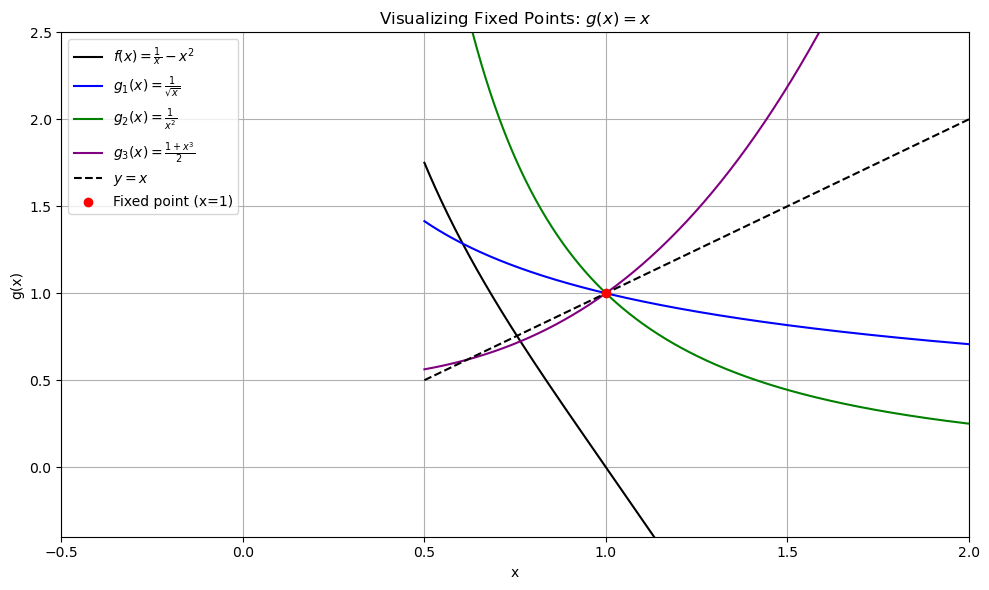

In [73]:
plt.figure(figsize=(10, 6))
plt.plot(x_vals, f1, label=r"$f(x) = \frac{1}{x} - x^2$", color="black")
plt.plot(x_vals, g1, label=r"$g_1(x) = \frac{1}{\sqrt{x}}$", color="blue")
plt.plot(x_vals, g2, label=r"$g_2(x) = \frac{1}{x^2}$", color="green")
plt.plot(x_vals, g3, label=r"$g_3(x) = \frac{1 + x^3}{2}$", color="purple")
plt.plot(x_vals, identity, label=r"$y = x$", color="black", linestyle="--")

plt.scatter([1], [1], color="red", zorder=5, label="Fixed point (x=1)")

plt.xlabel("x")
plt.ylabel("g(x)")
plt.title("Visualizing Fixed Points: $g(x) = x$")
plt.legend()
plt.grid(True)
plt.xlim(-0.5, 2)
plt.ylim(-0.4, 2.5)
plt.tight_layout()
plt.show()

# 2.6

In [91]:
x_vals = np.linspace(-1, 3, 1000)  
x_vals = np.sort(np.append(x_vals, 0.0))  # ensure 0 is in the array
f = (np.e**x_vals) - 3*x_vals -1
g = np.log(3*x_vals + 1)

/var/folders/dz/bzxsk9tj3clf0cs7vg6r7h_80000gn/T/ipykernel_97311/3032557214.py:4: RuntimeWarning: invalid value encountered in log
  g = np.log(3*x_vals + 1)


In [92]:
fixed_point_indices = np.where(np.isclose(g, x_vals, atol=1e-3))
fixed_points = x_vals[fixed_point_indices]

fixed_points

array([0.       , 1.9029029])

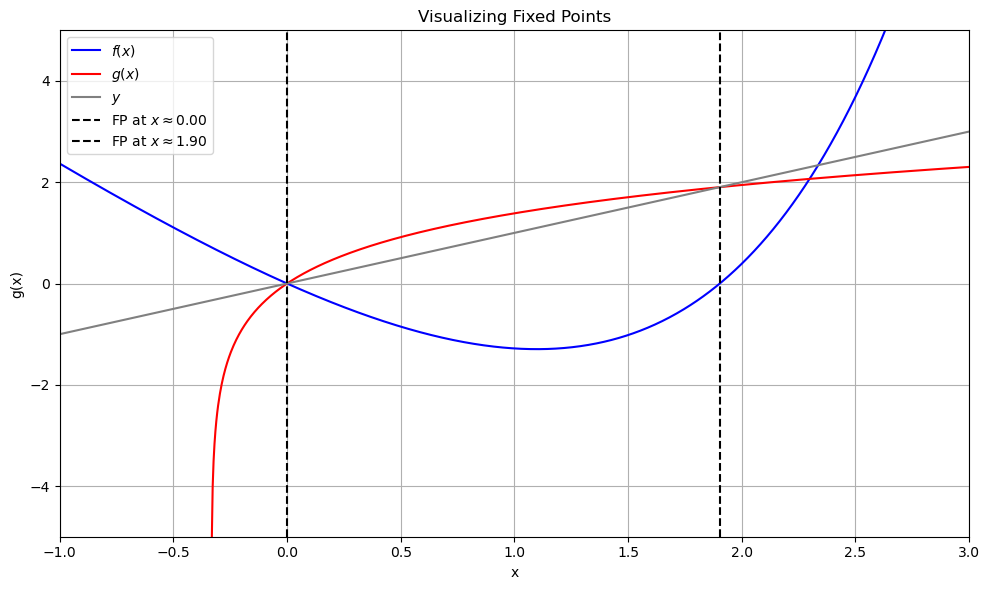

In [94]:
plt.figure(figsize=(10, 6))
plt.plot(x_vals, f, label=r"$f(x)$", color="blue")
plt.plot(x_vals, g, label=r"$g(x)$", color="red")
plt.plot(x_vals, x_vals, label=r"$y$", color="gray")

# Step 4: Add vertical lines at root approximations
for fp in fixed_points:
    plt.axvline(x=fp, color="black", linestyle="--", label=fr"FP at $x \approx {fp:.2f}$")
plt.xlabel("x")
plt.ylabel("g(x)")
plt.title("Visualizing Fixed Points")
plt.legend()
plt.grid(True)
plt.xlim(-1, 3)
plt.ylim(-5, 5)
plt.tight_layout()
plt.show()

In [87]:
sum(g == x_vals)

0